## Final Project Submission

Please fill out:
* Student name: Vivian Kwamboka
* Student pace: full time
* Scheduled project review date/time: 6/6/2025
* Instructor name: Samuel Karu
* Blog post URL:


### Business Understanding
#### The Business Problem
SyriaTel, a telecommunications company, is losing customers — they are churning (i.e., canceling service). This leads to loss of revenue, higher customer acquisition costs, and brand damage.
- Key business question:
Can we predict which customers area at high risk of churning,so we can take action before they leave?

#### Business Objective
Reduce churn rate by:
- Identifying patterns in customer behavior
- Predicting customers likely to churn before it happens
- Enabling the business to act(e.g, offer discounts, improve service,launch campaigns)


#### Business Use Case
If we can predict churn, SyriaTel can:
- Proactively reach out to at_risk customers with retention offers
- Segment customers for better service targeting
- Improve customer experience by identifying pain points(e.g, high call charges, poor support)
##### Example Insight:
If customers without a voice mail plan and high imternational call charges are more likely to churn, SyriaTel can offer them a better plan or discount.

### Data Understanding
I will be using the SyriaTel customer dataset, modeling the **churn** based on all other numeric features of the dataset.The target variable churn (1 = customer left, 0 = customer stayed)


In [31]:
# Import necessary libraries for data handling, visualization, modeling, and evaluation:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE


In [32]:
# Load the dataset and display the first few rows:
df = pd.read_csv('TelCustomer_Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
# print the shape of the dataset:
df.shape

(3333, 21)

#### Data Preperation
In this section, I will clean and preprocess the data to ensure it is suitable for modeling. The steps include:
- Removing columns with missing or irrelevant values
- Encoding categorical variables into numeric format
- Converting the target variable to integer type
- Splitting the dataset into features and target variable
- Dividing the data into training and testing sets

These steps help improve model performance and ensure accurate predictions.

In [34]:
# Data Cleaning
# Keep only columns with no missing values
df = df.dropna(axis=1, how='any')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
# Drop irrelevant columns
df = df.drop(columns=['phone number', 'state'])

In [36]:
# Encode categorical variables with Label Encoder and display unique values:
le = LabelEncoder()
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
# print the values of the encoded columns
print("International Plan Encoded Values:", df['international plan'].unique())
print("Voice Mail Plan Encoded Values:", df['voice mail plan'].unique())

International Plan Encoded Values: [0 1]
Voice Mail Plan Encoded Values: [1 0]


In [37]:
# convert the target variable 'churn' to integers
df['churn'] = df['churn'].astype(int)


In [38]:
# Split the dataset into features and target variable
X = df.drop(columns=['churn'], axis=1)
y = df['churn']

#### Modelling
I will apply the Logistic Regression predictive model as it is simple and interpretable model suitable for binary classification.

 I will also perform a train-test split(80% training, 20% test)so that i will be fitting the model using the training dataset and evaluating the model using the testing dataset.

The performance will be evaluated using:
- Accuracy
- Precision, Recall, F1-Score
- Confusion Matrix
- ROC AUC Score
- ROC Curve

In [39]:
# Feature scaling (Important for convergence in logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Split the dataset into training and testing sets using train_test_split():
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train a logistic regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [42]:
# Make predictions on the test set and calculate probabilities:
y_pred= model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
# Evaluate the model
print('Logistic Regression Model Evaluation with SMOTE')
print('classification_report:\n', classification_report(y_test, y_pred))
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print('ROC AUC Score:', roc_auc)

Logistic Regression Model Evaluation with SMOTE
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.57      0.12      0.20       101

    accuracy                           0.85       667
   macro avg       0.72      0.55      0.56       667
weighted avg       0.82      0.85      0.81       667

confusion_matrix:
 [[557   9]
 [ 89  12]]
ROC AUC Score: 0.8231116397858866


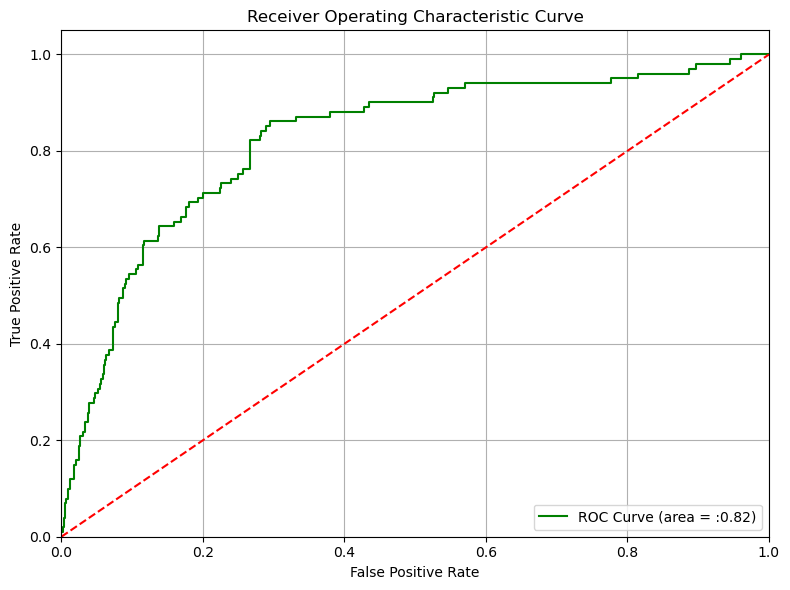

In [43]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='ROC Curve (area = :%.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### Evaluation Summary
**Precision** for class **1** is 0.57 meaning that 57% of the predicted churns were correct which isn't bad, but many false positives also existed.

 **Recall** for class **1** is 0.12 which means that the model caught 12% of actual churners ,missing most of them.

The **F1 Score** of 0.20 is too low probably because of the poor Recall

 **Confusion Matrix**
- True Negatives = 557 (correctly predicted stay)
- False Positives = 9 (predicted churn, actually stayed)
- False Negatives = 89 (missed churners)
- True Positives = 12 (correctly predicted churn)

 So the model does well at predicting those who won't churn but poorly at catching who will.

**Accuracy**
Overall correct predictions is 85% but this is misleading since the dataset is imbalanced(most people stay)

#### Improving Recall with SMOTE

The initial logistic regression model showed low recall for the minority class (churners), meaning it missed many actual churn cases. This is often due to class imbalance, where the number of non-churners greatly exceeds churners

To address this, we can use **SMOTE** (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class in the training data. By balancing the classes, SMOTE helps the model better learn patterns associated with churners, potentially improving recall.

**Steps:**
- Apply SMOTE to the training set to create a balanced dataset.
- Retrain the model on the resampled data.
- Evaluate recall and other metrics to check for improvement.

SMOTE is a powerful technique for imbalanced classification problems, especially when the goal is to identify as many positive cases (churners) as possible.

In [44]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [45]:
# Logistic Regression with SMOTE
model_smote = LogisticRegression(max_iter=5000, solver='liblinear')
model_smote.fit(X_resampled, y_resampled)
# Make predictions on the test set with SMOTE
y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]
# Evaluate the model with SMOTE
print('Logistic Regression Model Evaluation with SMOTE')
print('classification_report:\n', classification_report(y_test, y_pred_smote))
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_smote))
# Calculate ROC AUC score
roc_auc_smote = roc_auc_score(y_test, y_proba_smote)
print('ROC AUC Score:', roc_auc_smote)

Logistic Regression Model Evaluation with SMOTE
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       566
           1       0.32      0.71      0.44       101

    accuracy                           0.73       667
   macro avg       0.63      0.72      0.63       667
weighted avg       0.84      0.73      0.76       667

confusion_matrix:
 [[413 153]
 [ 29  72]]
ROC AUC Score: 0.805093936955533


#### Why Use Naive Bayes with SMOTE?

Naive Bayes is a simple yet effective classification algorithm, especially suitable for high-dimensional datasets and when features are (mostly) independent. However, like many classifiers, its performance can be significantly affected by class imbalance—when one class (such as "churn") is much less frequent than the other.

**SMOTE** (Synthetic Minority Over-sampling Technique) addresses this issue by generating synthetic samples for the minority class, balancing the dataset. By combining Naive Bayes with SMOTE, we can:

- Provide the Naive Bayes model with a more balanced training set, helping it better learn the characteristics of the minority class (churners).
- Improve recall and F1-score for the minority class, making the model more effective at identifying customers likely to churn.
- Reduce bias toward the majority class, leading to more reliable predictions.

This approach is particularly useful when the business goal is to identify as many churners as possible, even at the cost of some false positives.

In [46]:
# Naive Bayes with SMOTE
model_nb = GaussianNB()
# Fit the model on the resampled data
model_nb.fit(X_resampled, y_resampled)
# Make predictions on the test set with Naive Bayes
y_pred_nb = model_nb.predict(X_test)
y_proba_nb = model_nb.predict_proba(X_test)[:, 1]
# Evaluate the Naive Bayes model
print('Naive Bayes Model Evaluation with SMOTE')
print('classification_report:\n', classification_report(y_test, y_pred_nb))
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_nb))
# Calculate ROC AUC score for Naive Bayes
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print('ROC AUC Score:', roc_auc_nb)

Naive Bayes Model Evaluation with SMOTE
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77       566
           1       0.28      0.76      0.41       101

    accuracy                           0.66       667
   macro avg       0.61      0.70      0.59       667
weighted avg       0.84      0.66      0.71       667

confusion_matrix:
 [[366 200]
 [ 24  77]]
ROC AUC Score: 0.7771227652800615


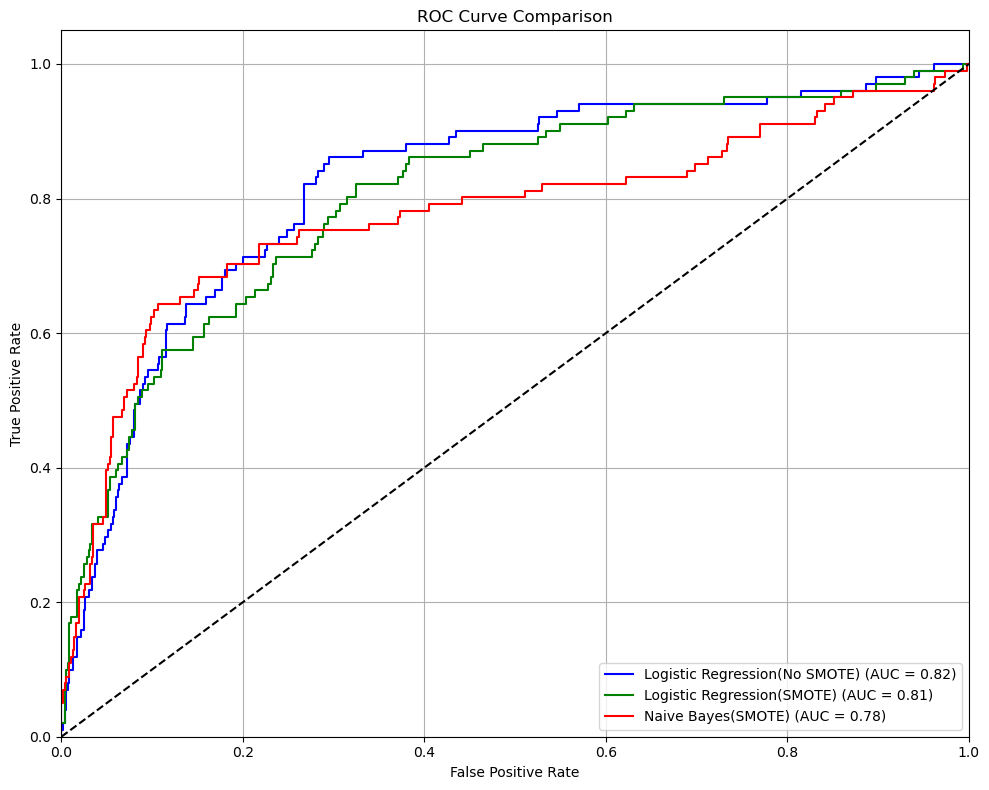

In [47]:
# Plot ROC Curve for all models
fpr, tpr, _ = roc_curve(y_test, y_proba)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression(No SMOTE) (AUC = %.2f)' % roc_auc)
plt.plot(fpr_smote, tpr_smote, color='green', label='Logistic Regression(SMOTE) (AUC = %.2f)' % roc_auc_smote)
plt.plot(fpr_nb, tpr_nb, color='red', label='Naive Bayes(SMOTE) (AUC = %.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Hyperparameter Tuning for Logistic Regression
we'll use **GridSearchCV** to try different hyperparameters.

In [48]:
# apply grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize logistic regression
logreg = LogisticRegression(max_iter=5000)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best model
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)
y_proba_best = best_logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix:
 [[418 148]
 [ 29  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       566
           1       0.33      0.71      0.45       101

    accuracy                           0.73       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.84      0.73      0.77       667

ROC AUC Score: 0.8006157506209984


#### Why Use Threshold Adjustment?

In classification problems, models typically use a default probability threshold of 0.5 to decide between classes. However, this may not provide the best balance between **precision** (how many predicted churns are correct) and **recall** (how many actual churners are identified), especially with imbalanced datasets.

By adjusting the decision threshold, we can:
- Increase recall (catch more churners) at the expense of precision, or vice versa, depending on business needs.
- Find an optimal trade-off that aligns with business goals, such as minimizing false negatives (missed churners) or false positives (incorrectly flagged churners).
- Improve the F1-score, which balances both precision and recall.

Threshold tuning is especially useful when the cost of missing a churner is much higher than incorrectly predicting churn, allowing for more effective and actionable predictions.

In [49]:
# Threshhold tuning to balance precision and recall
from sklearn.metrics import precision_recall_curve, f1_score

# Step 1: Predict probabilities
y_probs = best_logreg.predict_proba(X_test)[:, 1]  # Get probability for class 1 (churn)

# Step 2: Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Step 3: Find best threshold by F1-score (or manually inspect)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"F1-Score at Best Threshold: {f1_scores[best_idx]:.2f}")

# Step 4: Use this new threshold for final prediction
y_pred_thresholded = (y_probs >= best_threshold).astype(int)

# Step 5: Evaluate
print("Classification Report (adjusted threshold):")
print(classification_report(y_test, y_pred_thresholded))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresholded))
print("ROC AUC Score (adjusted threshold):", roc_auc_score(y_test, y_probs))


Best Threshold: 0.66
F1-Score at Best Threshold: 0.52
Classification Report (adjusted threshold):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       566
           1       0.49      0.55      0.52       101

    accuracy                           0.85       667
   macro avg       0.70      0.73      0.71       667
weighted avg       0.85      0.85      0.85       667

Confusion Matrix:
[[508  58]
 [ 45  56]]
ROC AUC Score (adjusted threshold): 0.8006157506209984


In [50]:
# create submission dataframe
predictions = pd.DataFrame({
    'customer_id': y_test.index, 
    'predicted_churn': y_pred_thresholded
})
# Display the first few rows of the predictions dataframe
predictions.head()

,customer_id,predicted_churn
0,438,0
1,2674,0
2,1345,0
3,1957,0
4,2148,0


In [51]:
# Save to CSV
predictions.to_csv('customer_churn_predictions.csv', index=False)